In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from agent_replay import AgentPOMDP
from utils import plot_maze, load_env, plot_env
import scipy
np.random.seed(2)

## Specify parameters

In [2]:
env            = 'tolman123_nocheat' # name of the environment 
env_file_path  = os.path.abspath(os.path.join(sys.path[0], '../../code/mazes/' + env + '.txt'))
env_config     = load_env(env_file_path)

# --- Specify agent parameters ---
pag_config = {
    'alpha': 1,
    'beta':  2, 
    'gamma': 0.9,
}

ag_config = {
    'alpha_r'        : 1,         # offline learning rate
    'horizon'        : 10,        # planning horizon (minus 1)
    'xi'             : 0.0001,    # EVB replay threshold
    'num_sims'       : 2000,      # number of MC simulations for need
    'sequences'      : False,     # sequence replay
    'env_name'       : env,       # gridworld name
    'barriers'       : [1, 1, 1]  # intial barrier configuration
}

agent = AgentPOMDP(*[pag_config, ag_config, env_config]) # initialise the agent

## Visualise maze

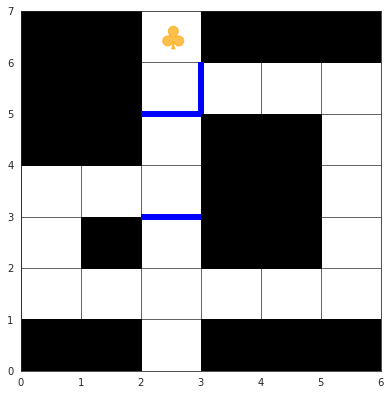

In [3]:
fig   = plt.figure(figsize=(5, 5))
ax    = fig.add_axes([0, 0, 1, 1])
plot_env(ax, agent)

## Initialise MF Q-values

In [4]:
Q_MB  = agent._solve_mb(1e-5, barriers=[1, 1, 0])

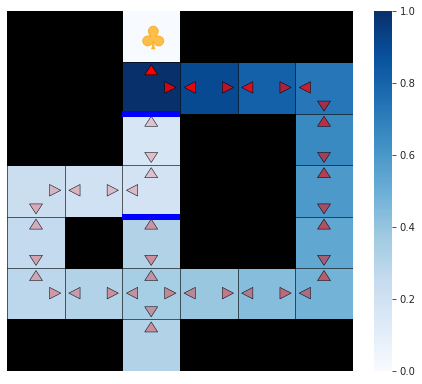

In [5]:
fig = plt.figure(figsize=(6, 5))
ax  = fig.add_axes([0, 0, 1, 1])
plot_maze(ax, Q_MB, agent)

## Run replay

In [6]:
agent.state = 38 # start state
agent.M     = np.array([[7, 2], [0, 1], [1, 0]])
agent.Q     = Q_MB.copy() # initialise MF Q values
Q_history, gain_history, need_history = agent._replay() # start replay

1 - Replay 1/1 [<14>, 0] horizon 8, q_old: 0.15, q_new: 0.73, evb: 0.00
[[7 2]
 [0 1]
 [1 0]]
---
2 - Replay 1/1 [<20>, 0] horizon 7, q_old: 0.15, q_new: 0.66, evb: 0.00
[[7 2]
 [0 1]
 [1 0]]
---
3 - Replay 1/1 [<19>, 3] horizon 6, q_old: 0.17, q_new: 0.59, evb: 0.00
[[7 2]
 [0 1]
 [1 0]]
---
4 - Replay 1/1 [<18>, 3] horizon 5, q_old: 0.19, q_new: 0.53, evb: 0.00
[[7 2]
 [0 1]
 [1 0]]
---
5 - Replay 1/1 [<24>, 0] horizon 4, q_old: 0.21, q_new: 0.48, evb: 0.01
[[7 2]
 [0 1]
 [1 0]]
---
6 - Replay 1/1 [<30>, 0] horizon 3, q_old: 0.23, q_new: 0.43, evb: 0.00
[[7 2]
 [0 1]
 [1 0]]
---
7 - Replay 1/1 [<31>, 2] horizon 2, q_old: 0.25, q_new: 0.39, evb: 0.00
[[7 2]
 [0 1]
 [1 0]]
---
8 - Replay 1/1 [<32>, 2] horizon 1, q_old: 0.28, q_new: 0.35, evb: 0.00
[[7 2]
 [0 1]
 [1 0]]
---


## Visualise new policy 

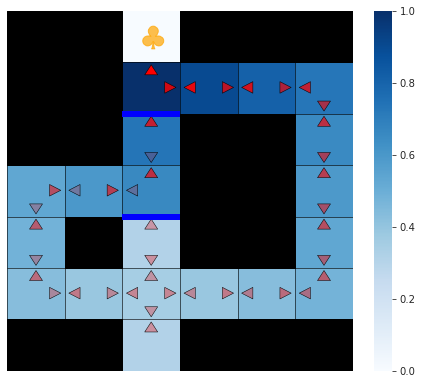

In [7]:
fig = plt.figure(figsize=(6, 5))
ax  = fig.add_axes([0, 0, 1, 1])
plot_maze(ax, agent.Q, agent)

## Visualise actions updated by replay

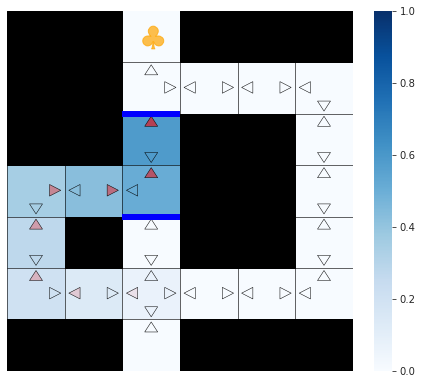

In [8]:
fig = plt.figure(figsize=(6, 5))
ax  = fig.add_axes([0, 0, 1, 1])
plot_maze(ax, agent.Q - Q_MB, agent)